# Função Trigonometrica

Vamos desenvolver um algoritmo para ajustarmos uma curva de equação
$$
y(x) = \alpha \sin(x) + \beta \cos(x)
$$


Dada uma lista de pontos $(x_1,y_1), (x_2,y_2), \ldots, (x_n, y_n)$, uma função trigonométrica $y(x) = \alpha \sin(x) + \beta \cos(x)$, que melhor se ajuste à lita dada pode ser obtida usando o método dos mínimos quadráticos:

$$x =(A^T \times A)^{-1} (A^T \times v).$$

Onde

$A = \begin{bmatrix}
   \sin x_1 & \cos x_1 \\
   \sin x_2 & \cos x_2 \\
   \vdots & \vdots \\
   \sin x_n & \cos x_n \\
  \end{bmatrix}
\mbox{, }
v = \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
  \end{bmatrix}
\mbox{ e }
x = \begin{bmatrix}
   \alpha\\
   \beta
  \end{bmatrix}
$

In [1]:
''' 
Método de ajuste de uma curva y(x) = a sen x + b cos x, por mínimos quadrados, 
a uma lista de pontos no plano cartesiano.

Observações:
--> os argumentos da função são duas listas de mesmo tamanho;
--> a primeira lista com as coordenadas x dos pontos da lista;
--> e a segunda lista com as coordenadas y dos pontos da lista;.

A função retorna um vetor x = [a,b]^T, onde y(x) = a sen x + b cos x da curva trigonométrica que melhor se ajusta à curva.
'''

def trigonometrica_minimos_quadrados(X,Y):
    import numpy as np
    from numpy.linalg import inv
    
    n = len(X)
    
    if len(X) != len(Y):
        return 'Dados de entrada incorretos.'
        
    else:
        A = np.zeros((n,2))
        v = np.zeros((n,1))
        
        for i in range(len(X)):
            v[i] = Y[i]
            A[i][0] = np.sin(X[i])
            A[i][1] = np.cos(X[i])
        
        At = np.transpose(A)

        M = np.dot(At,A)
        N = np.dot(At,v)
        
        Mi = inv(M)
        x = np.dot(Mi,N)

        return x

In [2]:
x = [-6,-3,1,5,7,-8]
y = [3,1,3,-1,3,-1]

c = trigonometrica_minimos_quadrados(x,y)
print(c)

[[1.81023547]
 [1.19017207]]


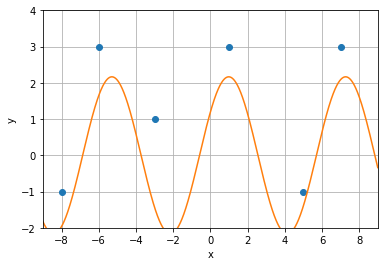

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plotando os pontos
plt.plot(x,y,'o')

# Preparo para a plotagem da curva
X = np.linspace(-9, 9, 2000) # 1000 pontos em [0, 8]
Y = c[0][0]*np.sin(X) + c[1][0]*np.cos(X) # Calculo dos valores y para cada x

# Plotando a curva
plt.plot(X,Y)

# Configurações do Plano
plt.axis([-9, 9, -2, 4])
plt.xlabel('x'), plt.ylabel('y')
plt.grid()

plt.show()